In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [3]:
df = pd.read_csv('fifa_300.csv')

In [4]:
df.head()

,pas accuracy,shooting,age,free_kick_accuracy,ball_control,balance,vision,jumping,strength,positioning,crossing,heading_accuracy,forvet
0,90,93,32,76,93,63,85,95,80,95,85,88,2
1,89,90,30,90,95,95,90,68,59,93,77,71,2
2,92,84,25,84,95,82,80,61,53,90,75,62,2
3,82,90,30,84,91,60,84,69,80,92,77,77,2
4,91,90,31,11,48,35,70,78,83,12,15,25,0


In [5]:
# total number of rows=17994 + 1
len(df.index)

300

In [6]:
def change_forvet(f):
    if f == 2:
        return 'good'
    elif f == 1:
        return 'average'
    else:
        return 'bad'
   

In [7]:
df['forvet'] = df['forvet'].apply(change_forvet)

In [8]:
def plot_decision_tree(clf,feature_name,path,target_name):
    f = io.StringIO()  
    tree.export_graphviz(clf, out_file=f,  
                         feature_names=feature_name,  
                         class_names=target_name,filled=True, rounded=True, special_characters=True)  
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

In [9]:
train, test = train_test_split(df, test_size = 0.30)

In [10]:
train

,pas accuracy,shooting,age,free_kick_accuracy,ball_control,balance,vision,jumping,strength,positioning,crossing,heading_accuracy,forvet
298,87,79,20,54,85,92,75,75,63,83,66,66,good
118,86,83,28,22,14,58,46,73,73,12,24,13,bad
166,76,39,27,33,72,61,59,82,78,35,49,83,bad
296,78,81,32,14,23,45,37,59,70,15,18,16,bad
174,69,70,29,81,85,86,85,58,67,75,80,45,average
254,83,77,27,14,22,51,48,71,65,14,12,16,bad
129,73,71,22,47,88,90,81,56,59,74,62,42,average
248,64,66,26,57,76,66,67,81,93,65,63,73,average
265,30,41,30,37,72,32,47,40,90,32,44,89,bad
143,74,64,23,63,75,66,58,87,78,58,69,72,bad


In [11]:
test

,pas accuracy,shooting,age,free_kick_accuracy,ball_control,balance,vision,jumping,strength,positioning,crossing,heading_accuracy,forvet
141,71,38,23,32,76,68,51,85,74,46,72,80,bad
37,75,81,30,68,83,77,80,82,77,80,76,81,average
52,77,82,27,59,82,72,81,81,67,93,77,82,good
194,80,83,34,11,23,60,65,73,72,13,11,13,bad
243,83,77,25,78,83,92,79,63,62,78,74,37,average
224,85,79,26,79,84,84,75,74,68,82,77,70,average
89,78,67,30,52,77,79,75,84,78,68,75,73,average
171,72,78,31,49,77,53,74,85,87,89,72,90,good
87,78,72,31,78,85,79,84,68,70,80,76,68,average
116,64,74,30,68,81,52,82,68,89,80,72,76,average


In [12]:
X_train = train.loc[:, train.columns != 'forvet']
Y_train = train.forvet
X_test = test.loc[:, test.columns != 'forvet']
Y_test = test.forvet

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [14]:
train.columns[12]

'forvet'

In [15]:
labels = ['average', 'bad', 'good']

C:\Users\egede\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


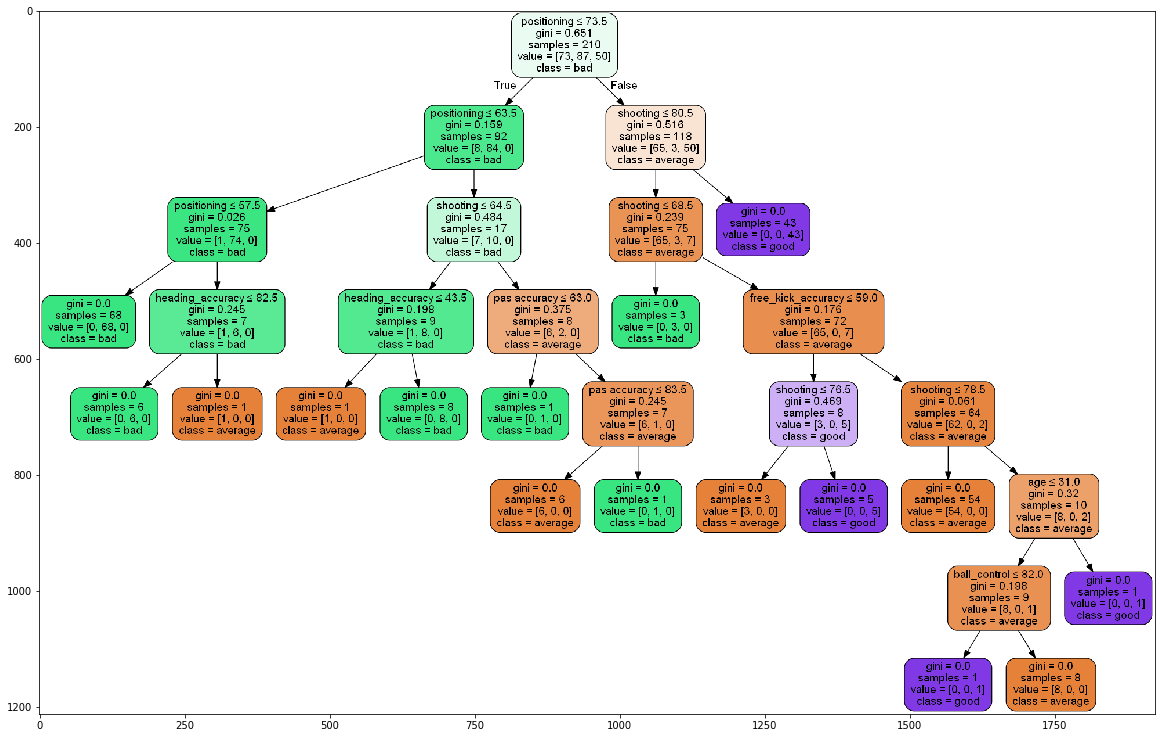

In [16]:
plot_decision_tree(clf, X_train.columns,'dt_common.png',labels)

In [17]:
Y_test

141        bad
37     average
52        good
194        bad
243    average
224    average
89     average
171       good
87     average
116    average
268       good
172    average
168    average
247    average
206    average
111        bad
35     average
16        good
55        good
7         good
288        bad
191    average
237    average
228    average
140    average
266       good
227    average
88         bad
184    average
274        bad
        ...   
160    average
136    average
104        bad
162        bad
68         bad
131        bad
289       good
8      average
63         bad
239    average
271    average
178    average
282        bad
139       good
201    average
293    average
148    average
106        bad
215    average
120        bad
61        good
283    average
229    average
153        bad
197        bad
23        good
70         bad
123        bad
99        good
186    average
Name: forvet, Length: 90, dtype: object

In [18]:
y_pred = clf.predict(X_test)

In [19]:
y_pred

array(['bad', 'good', 'good', 'bad', 'average', 'average', 'average',
       'good', 'average', 'average', 'good', 'average', 'average',
       'average', 'average', 'bad', 'average', 'good', 'good', 'good',
       'bad', 'average', 'average', 'average', 'average', 'good',
       'average', 'bad', 'average', 'bad', 'good', 'average', 'bad',
       'good', 'average', 'bad', 'bad', 'bad', 'bad', 'good', 'bad',
       'bad', 'bad', 'average', 'average', 'bad', 'average', 'average',
       'average', 'good', 'bad', 'bad', 'average', 'good', 'bad', 'bad',
       'bad', 'bad', 'bad', 'average', 'average', 'average', 'bad', 'bad',
       'bad', 'bad', 'good', 'good', 'bad', 'average', 'average', 'bad',
       'bad', 'good', 'average', 'average', 'average', 'bad', 'average',
       'bad', 'good', 'average', 'average', 'bad', 'bad', 'good', 'bad',
       'bad', 'average', 'bad'], dtype=object)

In [20]:
score = accuracy_score (Y_test, y_pred)*100

In [21]:
print("Accuracy using Decision Tree", round(score), "%")

Accuracy using Decision Tree 86.0 %


In [22]:
df.ix[289]

C:\Users\egede\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


pas accuracy            72
shooting                82
age                     31
free_kick_accuracy      36
ball_control            75
balance                 53
vision                  62
jumping                 76
strength                86
positioning             84
crossing                62
heading_accuracy        83
forvet                good
Name: 289, dtype: object

In [26]:
df.ix[56]

pas accuracy           66
shooting               58
age                    28
free_kick_accuracy     69
ball_control           70
balance                50
vision                 67
jumping                81
strength               82
positioning            56
crossing               64
heading_accuracy       82
forvet                bad
Name: 56, dtype: object